# Google Play and Apple iOS App Recommendations

### Scenario:

We're data analysts for an app development company in the United States. Over the last five years we have established a respectably sized customer based, but there are still opportunities to grow our customer base and increase revenue. We want to develop a new app that is a stand-alone free version that our customers will enjoy. To generate revenue, we may employ either in-app advertising, purchases, or subscriptions.

Management of the development team at our organization has asked the analysts to gather data from Google Play and the Apple Store to make recommendations for the newest app they wish to develop. We ask that the development focus on creating an app that belongs to at least one of the three following categories: **Personalization** (apps meant to customize a user's phone/tablet), **Books** (e-readers, dictionaries, and reference material), **Sports** (apps that allow users to track their favorite teams, sporting events, players, and other related topics).

It was not clear at first which categories were the most "popular" or had the most user engagement. We concluded that the average rating, download count, and total count of apps in a particular category were sufficient to narrow down the results to the final recommendations.

Generally, these categories have the highest average rating compared to other categories in both libraries (Google and Apple). Thus, it could be considered that these three categories to be well-received by users. The number of downloads/installs typically resides in an area between the minimum and maximum number of median downloads (the mean was not used due to skewness). Lastly, we had to consider market saturation. Our recommendations do not appear to be too heavily saturated with other competing apps. 

Since we want to develop a new app for Google Play and iOS, the app recommendations had to show evidence of success (as defined above) for both markets. This was a primary consideration for picking these three categories.
To minimize risks and overhead, our validation strategy for an app idea has three steps:

* Build a minimal Android version of the app and add it to Google Play.
* If the app has a good response from users, we develop it further.
* If the app is profitable after six months, **we build an iOS version of the app and add it to the App Store**.

To summarize, the three best app recommendations are: Personalization, Books, or Sports

## Method
Before we do any visualization or making recommendations, we first need to do the following:
* Load in the datasets
* Additional data cleaning
* Exploratory data analysis, some high-level overview to include charts and tables
* Narrow down app categories to less than 5 categories
* Final recommendations


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline
import matplotlib.style as style
#pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [2]:
# Google play dataset
csv = pd.read_csv("google_apps_cleaned.csv")
csv.head()

# Apple iOS dataset
apple_csv = pd.read_csv("apple_apps_cleaned.csv")

As a brief introduction to correlation heatmaps, the following properties belong to correlation values:

Pearson's r (correlation) values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to -1.00. **A value of 0.0 shows no correlation.**

A positive correlation indicates two values increase or decrease in the same direction.

A negative correlation indicates the opposite: If a value increases, the other value decreases. 

For further reading on the Pearson Correlation coefficient: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg

Values with a positive correlation (up to +1.0) are in green. Brown color indicates a negative (down to -1.0) correlation. At a first glance it seems that as apps that have higher `Maximum Installs` tend to have more `Ratings` (correlation is 0.54).

At a high level, this heatmap does not significantly help us identify values that have meaningful correlation to this analysis.

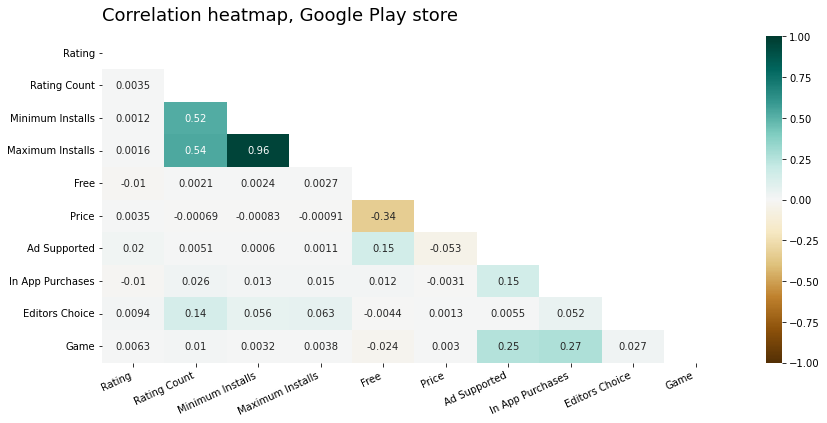

In [3]:
# Correlation matrix for google play
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(csv.corr(), dtype=bool))
heatmap = sns.heatmap(csv.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation heatmap, Google Play store", fontdict={'fontsize':18}, pad=16, loc = "left")
plt.xticks(rotation = 25, ha = "right")
plt.show()

### Column information
The cleaned data sets do not contain missing data, and I removed several irrelevant columns that would not help our analysis.
A complete look at the data cleaning process for both google and apple (iOS) datasets can be found within the attached notebook file:
 
* `google_play_eda.ipynb`
* `apple_ios_eda.ipynb`.

The following steps were taken for both datasets:

As mentioned in the introduction, the fictional app developer is a US based company, and we only develop applications for English-speaking users. Attempting to analyzing non-English language apps is not in our interest, therefore we'll remove as many instances of such apps.

I removed any observations that included apps named in foreign languages, especially non-Latin characters. To implement this task we can use the python method `.isascii()` in conjunction with a lambda function to iterate over all rows in a both the app name and developer columns. 

This method does have certain limitations. This method, `.isascii()` does not take into account English-language apps that contain emojis; it simply discards anything outside of traditional set of characters. Since many foreign languages use the latin alphabet, and may not always have accent marks, observations without accent marks are not filtered out from this method. It also does not take into account foreign words or names.

In short, this method filters out some English-language apps, and does not filter out all non-English apps. However, for this analysis it will probably not affect the results drastically.

For further reading on the American Standard Code for Information Interchange: *https://en.wikipedia.org/wiki/ASCII*

I filtered out any observations with 0 user installations (the number of times the app had been downloaded and installed) and 0 reviews. If the app had not been downloaded nor reviewed, it is not worth having unused applications that may skew the analysis. 

After data cleaning had been performed the original datasets had been reduced to about 40% of their original sizes, but I would consider the current number of remaining observations to be more than enough for a representative sample.

In [4]:
csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Google dataset length after data cleaning:",\
round(csv.shape[0] / 2312944 * 100, 2),"%") # 2,312,944 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946795 entries, 0 to 946794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          946795 non-null  object 
 1   Category          946795 non-null  object 
 2   Rating            946795 non-null  float64
 3   Rating Count      946795 non-null  float64
 4   Installs          946795 non-null  object 
 5   Minimum Installs  946795 non-null  float64
 6   Maximum Installs  946795 non-null  int64  
 7   Free              946795 non-null  bool   
 8   Price             946795 non-null  float64
 9   Currency          946783 non-null  object 
 10  Developer Id      946795 non-null  object 
 11  Released          928637 non-null  object 
 12  Last Updated      946795 non-null  object 
 13  Content Rating    946795 non-null  object 
 14  Ad Supported      946795 non-null  bool   
 15  In App Purchases  946795 non-null  bool   
 16  Editors Choice    94

In [5]:
apple_csv.info(memory_usage = "deep")
print("\n")

# Current dataset length (in percentage) after data cleaning
print("Remaining Apple dataset length after data cleaning:",\
round(apple_csv.shape[0] / 1230376 * 100, 2),"%") # 1,230,376 rows was the original length 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510475 entries, 0 to 510474
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   App_Name             510475 non-null  object 
 1   Primary_Genre        510475 non-null  object 
 2   Content_Rating       510475 non-null  object 
 3   Released             510475 non-null  object 
 4   Updated              510475 non-null  object 
 5   Version              510475 non-null  object 
 6   Price                510475 non-null  float64
 7   Currency             510475 non-null  object 
 8   Free                 510475 non-null  bool   
 9   Developer            510475 non-null  object 
 10  Average_User_Rating  510475 non-null  float64
 11  Reviews              510475 non-null  int64  
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 285.2 MB


Remaining Apple dataset length after data cleaning: 41.49 %


As shown above, I have already performed a majority of data cleaning beforehand. There are no missing rows, and the complete dataframes are 40% of their original size. All columns are in the appropriate data type; memory usage is still high, but significantly more performance friendly than the original datasets (over 1gb memory usage).

Before we begin looking at this analysis too deeply, let's become familiar with the dataset. 
First, you can see that google and apple have completely different developers. What we'll see is the total number of times these developers show up in both dataframes (these are both just the top 10 highest).

*Subsplash Inc*"* is the only developer that we see appear twice in both top 10 lists. 41% of apps developed by the 10 developers from google play are education-related apps. Meanwhile, 46% of the apps from apple's top 10 developers are food & drink. It's important to consider that this does not automatically mean these are the most popular apps in general, and we shouldn't focus to heavily on this fact.

### App developers

In [6]:
# 10 most numerous app developers
top_10 = csv["Developer Id"].value_counts()[:10].index.to_list() # Google app developers to list
top_10_apple = apple_csv["Developer"].value_counts()[:10].index.to_list() # iOS app developers to list

print("Top 10 Google Play store developers (by count)")
print(csv["Developer Id"].value_counts() [:10])
print("\n")
print("Top 10 Apple store developers (by count)")
print(apple_csv["Developer"].value_counts()[:10])

Top 10 Google Play store developers (by count)
Subsplash Inc             2296
+HOME by Ateam            1273
Games2Jolly                975
Virtuagym Professional     689
Education A19-Media        655
Education Media            603
Magzter Inc.               600
Education Galaxy Media     591
Kirill Sidorov             568
Education Nick Media       507
Name: Developer Id, dtype: int64


Top 10 Apple store developers (by count)
ChowNow                                     2865
MINDBODY, Incorporated                       535
Makeover Mania Story Games                   381
Tayga Games OOO                              379
Big Fish Games, Inc                          379
RAPID ACCELERATION INDIA PRIVATE LIMITED     368
Subsplash Inc                                352
Narvii Inc.                                  330
Magzter Inc.                                 320
GPSmyCity.com, Inc.                          317
Name: Developer, dtype: int64


In [7]:
# Category frequency for top 10 google app developers
print("Google developer top categories:")

# Uses app developer list to filter category frequency
print((csv[csv["Developer Id"].isin(top_10)]["Category"].value_counts(normalize = True) * 100)[:10])
print("\n")

# Category frequency for top 10 iOS app developers
print("Apple developer top categories:")

# Uses app developer list to filter category frequency
print((apple_csv[apple_csv["Developer"].isin(top_10_apple)]["Primary_Genre"].value_counts(normalize = True) * 100)[:10])

Google developer top categories:
Education            41.795135
Lifestyle            14.319973
Personalization      12.675574
Adventure            10.996917
Health & Fitness      8.062122
Books & Reference     6.566176
Art & Design          1.381752
News & Magazines      1.347493
Business              0.753683
Entertainment         0.548133
Name: Category, dtype: float64


Apple developer top categories:
Food & Drink              46.032766
Games                     18.069386
Health & Fitness           8.705429
Shopping                   6.039190
Travel                     5.268230
Social Networking          4.882750
Lifestyle                  4.866688
Education                  3.180212
Magazines & Newspapers     0.706714
Entertainment              0.610344
Name: Primary_Genre, dtype: float64


### App pricing
In the introduction it was stated that our fictional company develops free apps. Both app libraries are over 90% free to download, the reason this is true depends on how app developers generate revenue. Typically, the strategy for revenue includes advertisements within the app itself, or in-app purchases (microtransactions).

iOS app store dataset does not state whether each app supports advertisements, but the google play dataset does show if an app supports ads. 56% of google play apps support some type of in-app advertisement, and later this may be important to determine the type of revenue source of the app, depending on if particular categories are more inclined for advertisements or not.

Over 86% of google play apps do not support in-app purchases.

Below, I sampled apps that were priced over \$200. There are not too many apps that are this expensive, but it's interesting to see what applications are this expensive. Most of them don't have too many reviews and downloads.

In [8]:
# Free vs. paid apps frequency
print("Google apps free:")
print(csv["Free"].value_counts(normalize = True) * 100)
print("\n")

print("iOS apps free:")
print(apple_csv["Free"].value_counts(normalize=True) * 100)

Google apps free:
True     97.702459
False     2.297541
Name: Free, dtype: float64


iOS apps free:
True     90.887507
False     9.112493
Name: Free, dtype: float64


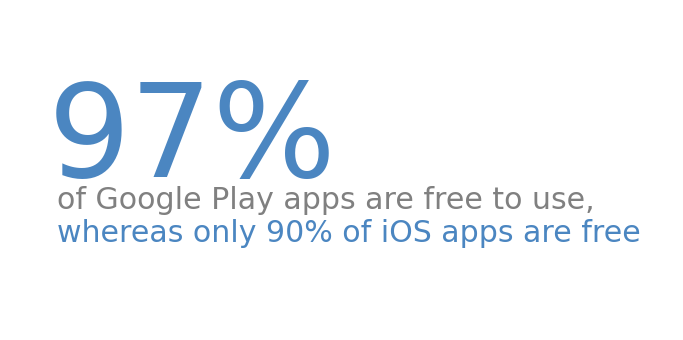

In [9]:
plt.subplots(figsize = (12, 6))

# Misc. text
plt.text(0.06,.48,"97%", size = 130, color = "#4B86C1")
plt.text(0.075, 0.38, "of Google Play apps are free to use,", size = 30, color = "grey")
plt.text(0.075, 0.28,"whereas only 90% of iOS apps are free", size = 30, color = "#4B86C1")

# Remove spines
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)

# Remove X and Y ticks
plt.xticks([])
plt.yticks([])

plt.show()

In [10]:
# Google play ad support
print("Google play ad support:")
csv["Ad Supported"].value_counts(normalize = True) * 100

Google play ad support:


True     56.019096
False    43.980904
Name: Ad Supported, dtype: float64

In [11]:
# Google in-app purchases
print("Google play in-app purchases (supported):")
csv["In App Purchases"].value_counts(normalize = True) * 100

Google play in-app purchases (supported):


False    86.431804
True     13.568196
Name: In App Purchases, dtype: float64

In [12]:
# Sample of apps listed over $200 per app (google)
csv[csv["Price"] > 200].sample(5, random_state = 1)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
272996,Challenge Impossible Ball for you,Arcade,5.0,6.0,1+,1.0,4,False,399.99,USD,Ibrahim Tornado,2020-03-10,2020-06-02,Everyone,False,False,False,True
582619,Most expensive word game,Board,3.4,122.0,"5,000+",5000.0,5523,False,399.99,USD,Vadaaa,2020-05-11,2020-10-13,Everyone,True,False,False,True
560299,Correct Score Pros - BRONZE VIP,Sports,4.8,42.0,10+,10.0,41,False,214.99,USD,Bet Kings UK,2020-07-20,2021-05-24,Everyone,True,False,False,False
254757,Most Expensive Ball Jump Game,Arcade,5.0,10.0,10+,10.0,19,False,269.99,USD,AIZ Fun Games,2019-11-24,2019-11-24,Everyone,False,False,False,True
624436,[Legacy] Alarmy (Sleep If U Can),Lifestyle,4.1,11534.0,"10,000+",10000.0,45305,False,379.99,USD,Alarm Clock Alarmy,2012-12-02,2020-02-10,Everyone,False,False,False,False


In [13]:
# Sample of apps listed over $200 per app (apple)
apple_csv[apple_csv["Price"] > 200].sample(5, random_state = 1)

,App_Name,Primary_Genre,Content_Rating,Released,Updated,Version,Price,Currency,Free,Developer,Average_User_Rating,Reviews
15304,MMD Exams,Education,4+,2019-05-21 07:45:37+00:00,2021-08-17 20:04:20+00:00,4.0.0,349.99,USD,False,Angad C,5.00000,2
411412,TuneLab Piano Tuner,Music,4+,2009-12-03 08:00:00+00:00,2021-06-14 00:55:36+00:00,4.5.1,299.99,USD,False,Real-Time Specialties,4.47058,17
16225,Sales Client PRO,Business,4+,2014-11-25 11:27:40+00:00,2018-08-09 17:15:26+00:00,2018.8,249.99,USD,False,mrys SOFTWARE - Marco Rey y Sander,2.00000,1
174377,Archipad Classic,Productivity,4+,2011-09-01 07:00:00+00:00,2021-09-20 08:02:07+00:00,7.9.1,599.99,USD,False,Bigsool,5.00000,1
398270,Complete Dynamics,Medical,17+,2012-09-28 18:09:28+00:00,2021-07-31 11:51:53+00:00,21.10,219.99,USD,False,Eduard van Grinsven,4.25000,4


### Education vs. Educational, what's the difference?
We'll see two different app categories from google play: `Education` and `Educational`. To clear any confusion before analysis, education apps are focused on teaching users new skills such as a new language, math, and includes software used by teachers to organize student grades and information. Google play has another category (this category is not listed in Apple) called educational. Educational apps are simply mobile games developed for the purpose of learning. 

## Category overview

If you're an android user (google play) you'll find that you have a far greater selection of app categories to choose from compared to the iOS library, and Google has more apps to choose from. The Google Play and Apple iOS libraries contain slightly more than 2 million apps each. However, we'll notice that both libraries share similarities when we compare how many apps belong to each category. Education, business, lifestyle, tools/utilities are typically the most frequent.

I believe one of the first things you'll see when you look at the frequency of Apple mobile apps is how many gaming apps are found in the iOS library. Over 20% of apple's library are just gaming, with the second highest app category belonging to education (less than 10%).

Overall, when we look at the average rating of all apps from both libraries there is not much of a difference. Google has a slightly higher average (4.09) compared to Apple (4.03). These average ratings are skewed by lower performing apps. Later on I'll perform some additional data cleaning that will remove any observations that contain outliers in the `Rating` and `Average_User_Rating` columns. This should provide a more accurate representation of average app ratings.

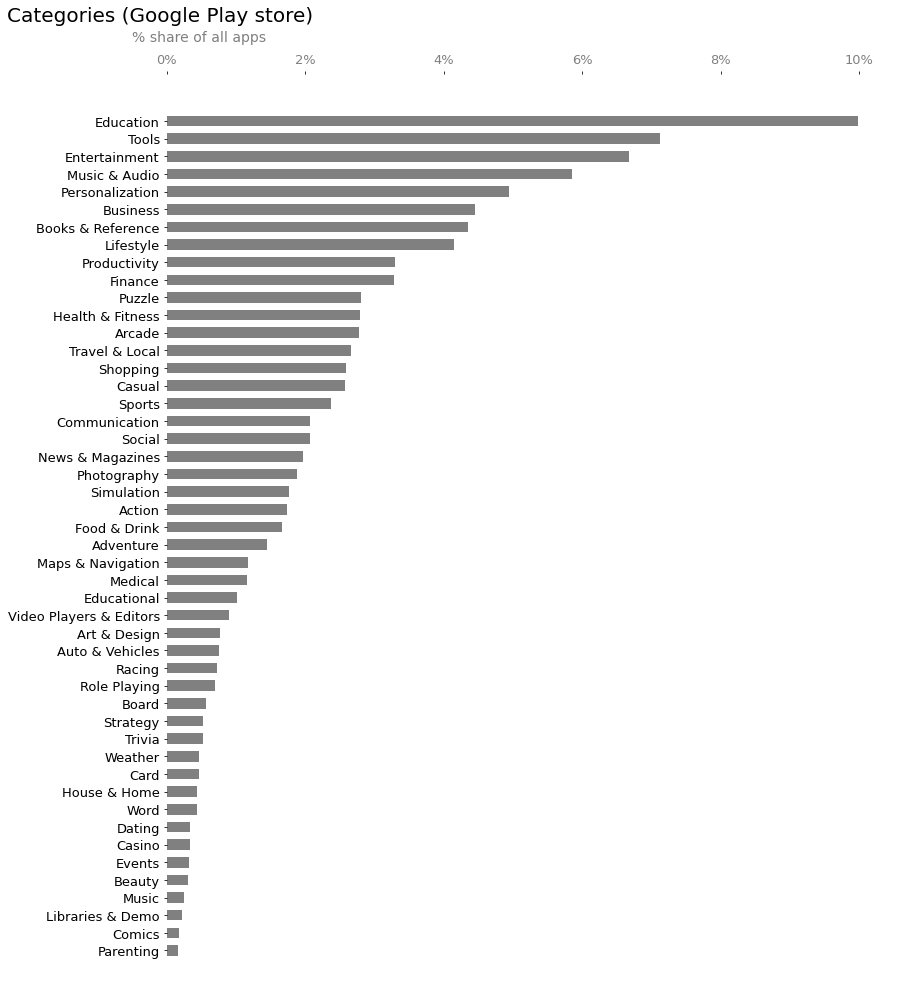

In [14]:
# Frequency of app categories
category_frequency = round(csv["Category"].value_counts(normalize = True) * 100, 2)

# Convert value counts series to pandas dataframe
category_frequency = pd.Series.to_frame(category_frequency).reset_index()

# Rename columns
category_frequency = category_frequency.rename(columns = {"index": "App_Category", "Category":"Percentage"})

# Plot Results
fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(category_frequency["App_Category"], category_frequency["Percentage"], color = "grey", height = 0.6)

# Invert y axis, descending order
plt.gca().invert_yaxis()

# Title
plt.title("Categories (Google Play store)", size = 20, loc = "left", x = -0.22, y = 1.05)

# Text
plt.text(-.5, -4.5,"% share of all apps", size = 14, color = "grey")

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# X axis to top
ax.xaxis.tick_top()

# X and Y ticks
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)

# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.show()

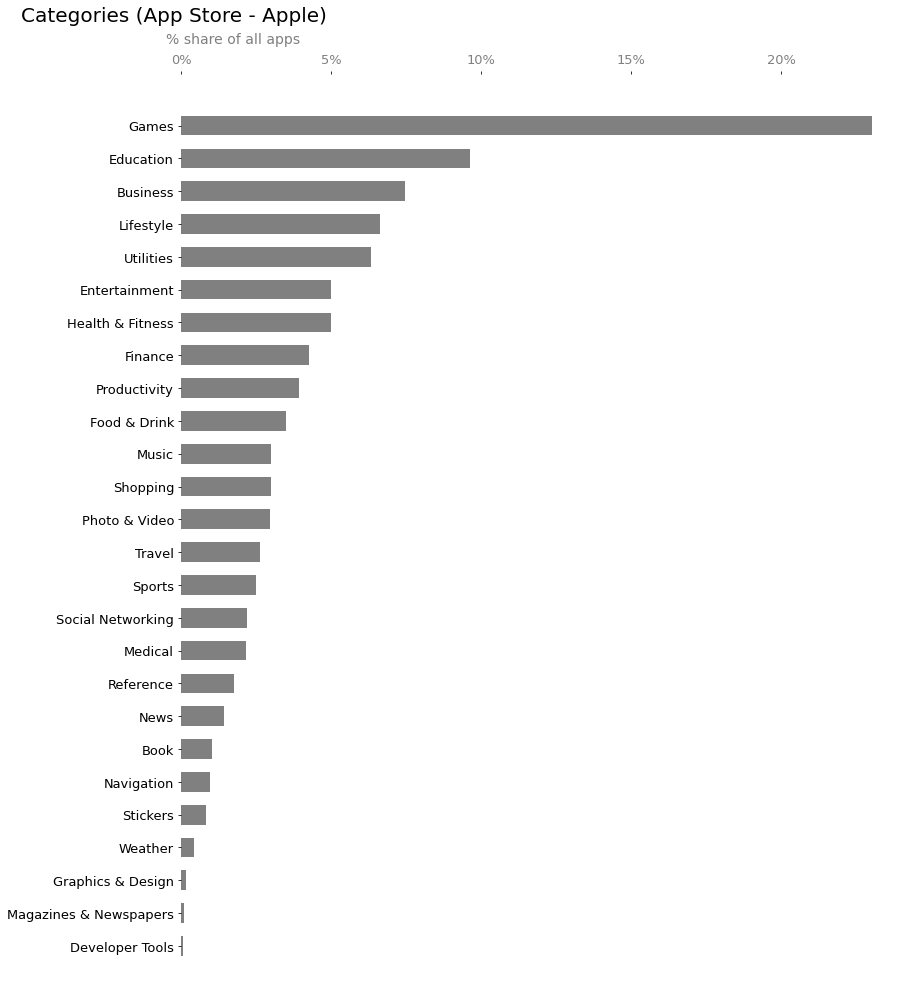

In [15]:
# Apple category frequency
apple_categories =  round(apple_csv["Primary_Genre"].value_counts(normalize = True) * 100, 2)

# Dataframe creation from category frequency
apple_categories = pd.Series.to_frame(apple_categories).reset_index()

# Rename created dataframe columns
apple_categories = apple_categories.rename(columns = {"index": "Category", "Primary_Genre":"Percentage"})

# Plot results
fig, ax = plt.subplots(figsize = (13, 17))
plt.barh(apple_categories["Category"], apple_categories["Percentage"], color = "grey", height = 0.6)

# Invert y axis, descending order
plt.gca().invert_yaxis()

# Title
plt.title("Categories (App Store - Apple)", size = 20, loc = "left", x = -0.22, y = 1.05)

# Text
plt.text(-.5, -2.5,"% share of all apps", size = 14, color = "grey")

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# X axis to top
ax.xaxis.tick_top()

# X and Y ticks
plt.xticks(size = 13, color = "grey")
plt.yticks(size = 13)

# Convert x ticks to percentage
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

plt.show()

### Category Ratings

A histogram and boxplot will help demonstrate the skewed behavior displayed by the app ratings. Users are allowed to rate the app on a scale of 1 (lowest) to 5 (highest).

We'll see that both libraries share very similar average ratings (~4.1), but the difference in their medians is more apparent (4.2 vs. 4.5). There are poorly rated apps that skew the averages for both libraries, thus we're not able to immediately tell what the more accurate average ratings are without removing outliers.



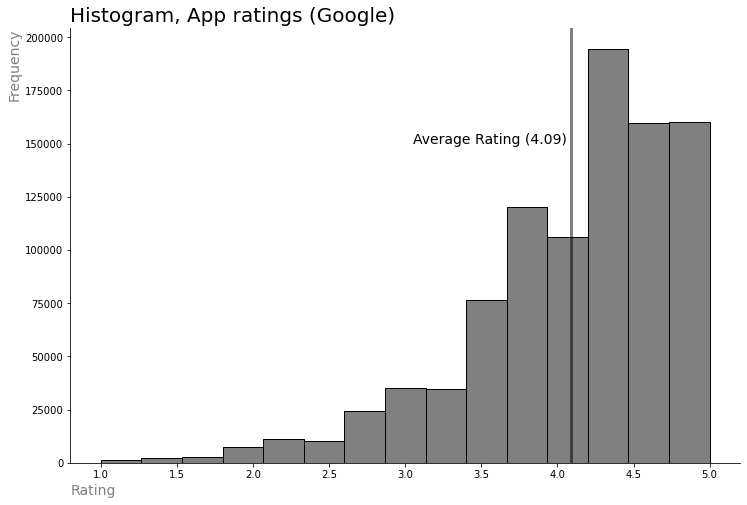

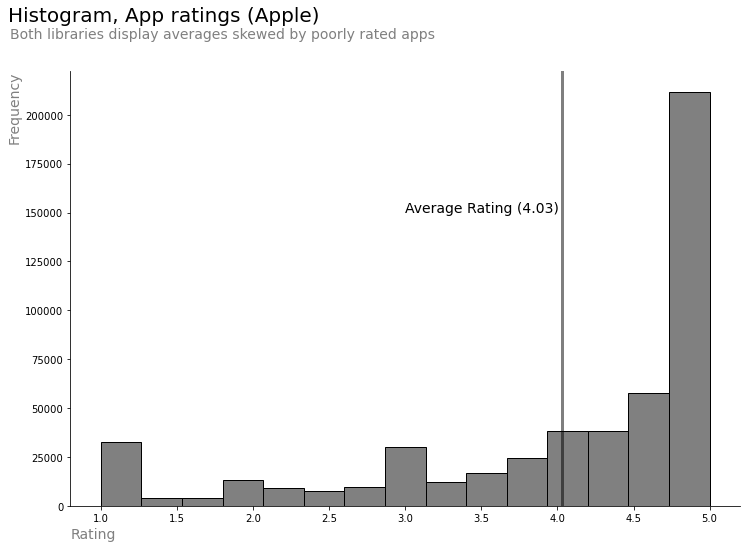

In [16]:
# Histogram google app ratings
plt.figure(figsize = (12,8))

# Plot results
plt.hist(x = "Rating", data = csv, edgecolor = "black", bins = 15, color = "grey")

# Remove borders
plt.gca().spines[["right","top"]].set_visible(False)

# X and Y labels
plt.xlabel("Rating", loc = "left", size = 14, color = "grey")
plt.ylabel("Frequency", size = 14, color = "grey", loc = "top")

# Title
plt.title("Histogram, App ratings (Google)", size = 20, loc = "left")

# Line to mark average app rating
plt.axvline(csv["Rating"].mean(), color = "black", alpha = 0.5, linewidth = 3)


# Text
average = csv["Rating"].mean() # f string
plt.text(3.05, 150000, f"Average Rating ({round(average, 2)})", size = 14, color = "black") 

plt.show()

########################################################################################################

# Histogram apple app ratings
plt.figure(figsize = (12,8))

# Plot results
plt.hist(x = "Average_User_Rating", data = apple_csv, edgecolor = "black", bins = 15, color = "grey")

# Remove borders
plt.gca().spines[["right","top"]].set_visible(False)

# X and Y labels
plt.xlabel("Rating", loc = "left", size = 14, color = "grey")
plt.ylabel("Frequency", size = 14, color = "grey", loc = "top")

# Title
plt.title("Histogram, App ratings (Apple)", size = 20, x = 0.14, y = 1.1)

# Line to mark average app rating
plt.axvline(apple_csv["Average_User_Rating"].mean(), color = "black", alpha = 0.5, linewidth = 3)

# Text
average = apple_csv["Average_User_Rating"].mean() # f string
plt.text(3, 150000, f"Average Rating ({round(average, 2)})", size = 14, color = "black")
plt.text(0.4,239000,"Both libraries display averages skewed by poorly rated apps", color = "grey", size = 14)

plt.show()

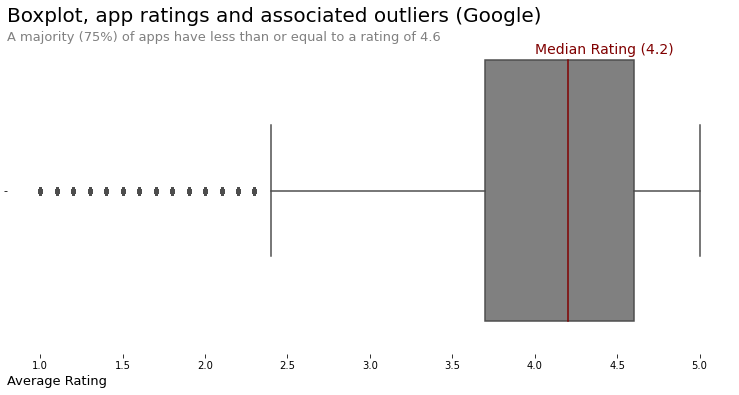

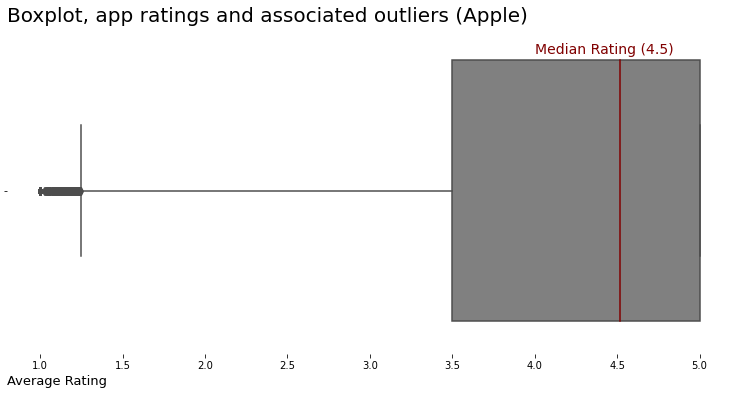

In [17]:
# Box plot google app ratings
plt.figure(figsize = (13, 6))

# Plot results
sns.boxplot(data = csv, x = "Rating", color = "grey", medianprops=dict(color="maroon", alpha=1))

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# Misc. text
plt.text(4,-0.42,"Median Rating (4.2)", color = "maroon", size = 14)
plt.text(0.8, -.46, "A majority (75%) of apps have less than or equal to a rating of 4.6", size = 13, color = "grey")

# Title
plt.title("Boxplot, app ratings and associated outliers (Google)", size = 20, loc = "left")

# X label
plt.xlabel("Average Rating", loc="left", size = 13)

plt.show()

##########################################################################################################

# Box plot apple app ratings
plt.figure(figsize = (13, 6))

# Plot results
sns.boxplot(data = apple_csv, x = "Average_User_Rating", color = "grey", medianprops=dict(color="maroon", alpha=1))

# Title
plt.title("Boxplot, app ratings and associated outliers (Apple)", size = 20, loc = "left")

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# Text
plt.text(4,-0.42,"Median Rating (4.5)", color = "maroon", size = 14)

# X label
plt.xlabel("Average Rating", loc="left", size = 13)

plt.show()


By utilizing the following code below, we can get rid of the outliers present in the ratings columns.

The upper quartile represents 75% of data
The lower quartile represents 25% of the data

Outliers for this series of data points are any ratings that are 1.5 times the difference between the upper and lower quartiles.
After this has been performed, the average rating for both datasets should improve.

In [18]:
# Remove low-rated outliers from both datasets

# Google

# Assigns variable to upper and lower quartiles (75% and 25%)
lower_quartile = csv["Rating"].quantile(0.25)
upper_quartile = csv["Rating"].quantile(0.75)

# Interquartile range of most data points
# upper - lower
iqr = upper_quartile - lower_quartile
iqr

# Establish lower bound data points
lower_bound = lower_quartile - (iqr * 1.5)
lower_bound

# Assigns variables to values that exceed the upper and lower bounds
lower_outliers = (csv["Rating"] < lower_bound)

# Excludes price outliers from the dataframe
android = csv[~lower_outliers].copy()

###############################################################################################

# Apple

# Assigns variable to upper and lower quartiles (75% and 25%)
lower_quartile = apple_csv["Average_User_Rating"].quantile(0.25)
upper_quartile = apple_csv["Average_User_Rating"].quantile(0.75)

# Interquartile range of most data points
# upper - lower
iqr = upper_quartile - lower_quartile
iqr


# Establish lower bound data points
lower_bound = lower_quartile - (iqr * 1.5)
lower_bound

# Assigns variables to values that exceed the upper and lower bounds
lower_outliers = (apple_csv["Average_User_Rating"] < lower_bound)

# Excludes price outliers from the dataframe
ios = apple_csv[~lower_outliers].copy()

`Rating Count` and `Reviews` describe the total number of reviews an application receives. For example, an app could have an average rating of 4.5 out of 5 and have 5,000 reviews. 

Below I've printed out the summary for both columns. We'll see that this column is heavily skewed by certain apps that have 100+ million reviews. Even with this in mind, the averages are very low and are less than 10,000 for each library.

This column could have been used as another metric for determining user engagement for a particular category but based on the information below I'd argue it's not reliable. 


In [19]:
print("Total Ratings: Google")
print(android["Rating Count"].describe())
print("\n")

print("Total Ratings: Apple")
print(ios["Reviews"].describe())

Total Ratings: Google
count    9.221430e+05
mean     5.701876e+03
std      2.950647e+05
min      5.000000e+00
25%      1.100000e+01
50%      3.400000e+01
75%      1.720000e+02
max      1.385576e+08
Name: Rating Count, dtype: float64


Total Ratings: Apple
count    4.781010e+05
mean     1.957727e+03
std      7.955289e+04
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      2.100000e+01
max      2.268533e+07
Name: Reviews, dtype: float64


Thus far we've learned the following:
* Some google play columns have a relationship between other columns, but is generally weak
* Over 90% of apps are free to download
* Generally, google play apps support advertisements
* The variety of app categories on the iOS app store is less than google play
* It seems that google's library is focused on a more utilitarian/educational approach, whereas apple seems to have more emphasis on gaming
* The average ratings for both libraries are skewed by poorly rated apps, which has been addressed
* New average rating for Google is 4.15
* New average rating for Apple is 4.24

### Summary Statistics

I've generated a pivot table below that quickly summarizes the columns for both datasets.
The goal of this analysis is to determine what type of app the development team should focus on. "Type" is a rather loose or subjective term, and since these libraries contains millions of apps it's impractical to comb over every single one. Instead of sorting through individual apps we'll focus on finding the most appropriate categories.

If we can narrow down the search to just a few different categories, it should provide a direction for the project. Therefore, this pivot table has been grouped by category, and using the `pivot_table()` method I provided several aggregate functions for this method to perform. 

* `Total_Count`: describes the total number of apps belonging to each category. We want to look for categories that have a "well rounded" number of apps, perhaps not too many as this may indicate over-saturation. Too few apps may suggest a particular category may be dominated by a just a handful of popular apps.

* `Downloads(Median)`: renamed from `Maximum Installs` (the number of times an app was downloaded), the median was calculated rather that the average. The distribution of values of this column are significantly skewed to the right by high profile apps, thus the median is a more appropriate calculation

* `Average_Rating`: the average rating of each category, the pivot table has been sorted by this column in descending order

In [20]:
# Changes from scientific notation to float format
pd.options.display.float_format = '{:.2f}'.format

# Creates pivot table from google dataset (android)
# Count categories, calculate average rating, calculate median installs
category_pivot_table = android.pivot_table\
(index = "Category", aggfunc = {"Category" : "count", "Rating" : "mean", "Maximum Installs": "median"})

# Rename columns in pivot table
category_pivot_table = category_pivot_table.rename\
(columns={"Category":"Total_Count", "Rating":"Average_Rating", "Maximum Installs":"Downloads (Median)"})

# Sort values first by average rating, and then sort by downloads, descending order
category_pivot_table = category_pivot_table.sort_values(by = ["Average_Rating","Downloads (Median)"], ascending = [False, False])

print("The average Google app rating is:", round(android["Rating"].mean(), 2), "out of 5")
category_pivot_table

The average Google app rating is: 4.15 out of 5


,Total_Count,Downloads (Median),Average_Rating
Category,,,
Events,2951,1263.00,4.37
Music & Audio,54817,4109.00,4.28
Arcade,26007,1665.00,4.28
Shopping,23846,2122.00,4.27
Personalization,46477,8719.00,4.27
Books & Reference,40593,6852.00,4.27
Word,4030,8237.00,4.26
Education,92641,3197.00,4.26
Puzzle,26408,5401.00,4.25


The scatter plot below represents the relationship between the columns from the pivot table created above. Each single circle is a different app category belonging to the google play store. 
The y-axis shows the total number of apps that belong to each app category, and the x axis indicating the number of downloads per category.

Many categories are clustered below a count of 60,000. We could consider a category above 60,000 to be an outlier, or there are simply too many apps that already belong to these particular categories. 

There are few outliers for median downloads past 30,000. The number of installs associated with an app combined with the rating provides a better explanation for consumer preferences. Instead, it might be better to keep any category that has median installs greater than the dataset median. 

In short, to narrow down our recommendations we may want to consider the following:

Google Play categories should
* have a `Total_Count` below 60,000
* have a median number of `Maximum Installs` greater than or equal to the dataset median
* have an average rating of at least 4.0, while the cutoff could be the average rating, a rating of 4 out of 5 is still good, and it's possible that if the
average rating (4.15) was used, there might be too many categories being unnecessarily filtered out

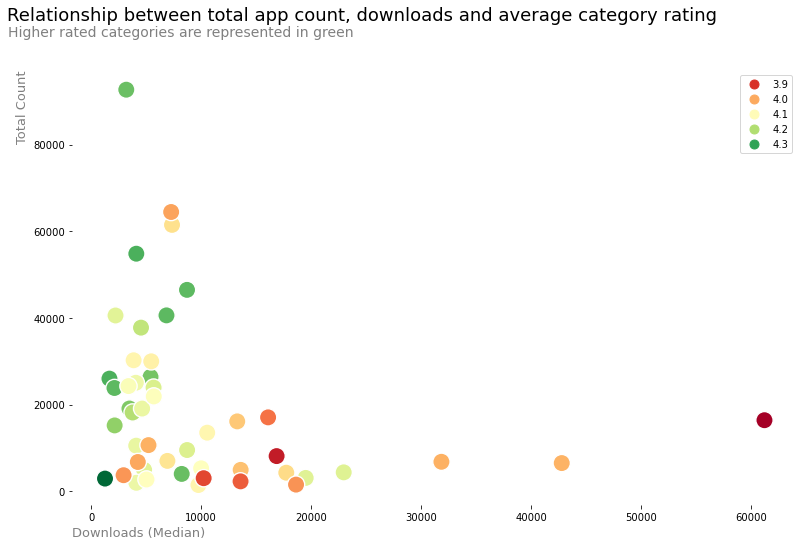

In [21]:
# Pivot table from above (google), shown as a scatterplot
plt.figure(figsize=(13, 8))

# Plot results
sns.scatterplot(x = "Downloads (Median)", y = "Total_Count",
data = category_pivot_table, hue = "Average_Rating", s = 300, palette = "RdYlGn")

# Show legend
plt.legend(markerscale = 1.5)

# Title
plt.title("Relationship between total app count, downloads and average category rating", size = 18, x = 0.4, y = 1.1)

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# X and Y labels
plt.ylabel("Total Count", size = 13, loc = "top", color = "grey")
plt.xlabel("Downloads (Median)", size = 13, loc = "left", color = "grey")

# Text
plt.text(-7600, 105000, "Higher rated categories are represented in green", size = 14, color = "grey")

plt.show()

In [22]:
print("Above average rated Google apps")

# Apps above average rating
# Compares each average rating from the pivot table to the overall average rating in the google play dataset
# If category in pivot table has higher rating than google play dataset, adds to new pivot table "highest_rated"
highest_rated = category_pivot_table[category_pivot_table["Average_Rating"] > android["Rating"].mean()].copy() # set copy

# Sort values by average_rating, followed by downloads in descending order
highest_rated = highest_rated.sort_values(by ="Downloads (Median)", ascending= False)

# Display pivot table
highest_rated

Above average rated Google apps


,Total_Count,Downloads (Median),Average_Rating
Category,,,
Weather,4391,22966.00,4.15
Educational,9538,8728.00,4.15
Personalization,46477,8719.00,4.27
Word,4030,8237.00,4.26
Books & Reference,40593,6852.00,4.27
Casual,23937,5680.00,4.16
Puzzle,26408,5401.00,4.25
Trivia,4944,4821.00,4.15
Lifestyle,37763,4537.00,4.18


In [23]:

print("The average iOS app rating is:", round(ios["Average_User_Rating"].mean(), 2), "out of 5")

# Creates pivot table from apple dataset (ios)
# Count primary genres, calculate average user rating
apple_pivot_table = ios.pivot_table\
(index = "Primary_Genre", aggfunc = {"Primary_Genre" : "count", "Average_User_Rating" : "mean"})

# Rename columns
apple_pivot_table = apple_pivot_table.rename(columns={"Primary_Genre":"Total_Count", "Average_User_Rating":"Average_Rating"})

# Sorts values by average rating in descending order
apple_pivot_table = apple_pivot_table.sort_values(by = "Average_Rating", ascending = False)

# Display pivot table
apple_pivot_table

The average iOS app rating is: 4.24 out of 5


,Average_Rating,Total_Count
Primary_Genre,,
Shopping,4.56,14734
Developer Tools,4.53,310
Food & Drink,4.48,16879
Graphics & Design,4.45,856
Lifestyle,4.39,32008
Stickers,4.39,3943
Health & Fitness,4.36,24091
Social Networking,4.36,10584
Business,4.34,35493


In [24]:
# aoole apps above average rating
# Compares each average rating from the apple pivot table to the overall average rating in the apple dataset
# If genre in pivot table has higher rating than apple dataset, adds to new pivot table "highest_rated_apple"
high_rated_apple = apple_pivot_table[apple_pivot_table["Average_Rating"] > ios["Average_User_Rating"].mean()]

# Display pivot table
high_rated_apple


,Average_Rating,Total_Count
Primary_Genre,,
Shopping,4.56,14734
Developer Tools,4.53,310
Food & Drink,4.48,16879
Graphics & Design,4.45,856
Lifestyle,4.39,32008
Stickers,4.39,3943
Health & Fitness,4.36,24091
Social Networking,4.36,10584
Business,4.34,35493


In [25]:
# Creates a list of the apple pivot table primary genre names (they are set as index)
apple_cat_list = apple_pivot_table.index.tolist() # tolist() method converts index elements to list

### Google Play app installs/downloads
Google play shows the number of times an app was installed/downloaded.
Apple does not contain this information.

The box plot below for Google apps demonstrates that the `Maximum Installs`(downloads) distribution is significantly skewed to the right by many apps. The truth is that many mobile applications that we'll find on the play store have only equal to or less than about 32,000 downloads. I'll provide a table called `popular_apps` below that shows how each of the top downloaded apps for each category drastically skews the true average for each category. Some of these apps have hundreds of millions of downloads and even billions. 

If we attempt to figure out what app categories are most downloaded just by the mean (average) we'll end up with flawed results, because of the skewness. A more appropriate approach is to use the median installs. 

In [26]:
print(android["Maximum Installs"].describe().apply(lambda x: format(x, "f")))
print("\n")
print("75% of google apps have less than or equal to", android["Maximum Installs"].quantile(0.75),"installs")

count         922143.000000
mean          662806.636466
std         35832034.696076
min                1.000000
25%             1143.000000
50%             5143.000000
75%            31448.000000
max      12057627016.000000
Name: Maximum Installs, dtype: object


75% of google apps have less than or equal to 31448.0 installs


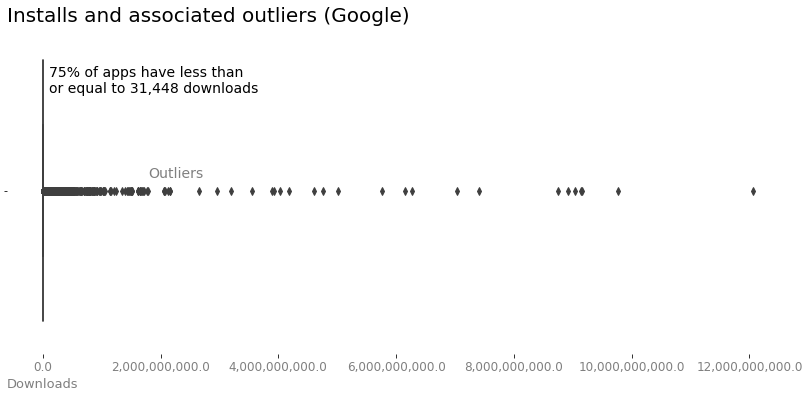

In [27]:
# Box plot, distribution of values in maximum installs (downloads) column, google play
fig, ax = plt.subplots(figsize = (14,6))

# Plot results
sns.boxplot(data = android, x = "Maximum Installs")

# Removes scientific notation
plt.ticklabel_format(style='plain', axis = "x")

# Title
plt.title("Installs and associated outliers (Google)", loc = "left", size = 20)

# Adds commas to x ticks, greater readability
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

# Misc. text
plt.text(1800000000,-0.04,"Outliers", size = 14, color = "grey")
plt.text(100000000,-0.3,"75% of apps have less than\nor equal to 31,448 downloads", size = 14)

# Remove borders
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)

# X label
plt.xlabel("Downloads", loc = "left", size = 13, color = "grey")

# X ticks
plt.xticks(size = 12, color = "grey")

plt.show()

### Apps with over 1 billion downloads
Google Play Services is the only app on the google play store that has over 10 billion downloads. This app is installed by default on android devices and is a critical component that enables google to authenticate services to the user. If this app is uninstalled, other apps may not work.

Google apps that have the most downloads include WhatsApp, YouTube, Google Drive, Gmail, Facebook, Netflix, TikTok, Candy Crush Saga, Instagram, Skype, Snapchat, and a host of other well-known applications.

In [28]:
# Any google apps with 10 billion installs
android[android["Installs"] == "10,000,000,000+"]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Game
884457,Google Play services,Tools,4.20,35128398.00,"10,000,000,000+",10000000000.00,12057627016,True,0.00,USD,Google LLC,2012-05-24,2021-06-10,Everyone,False,False,False,False


In [29]:
# List of apps with over 5 billion downloads
android[android["Installs"] =="5,000,000,000+"]["App Name"].unique().tolist()

['Google TV (previously Play Movies & TV)',
 'WhatsApp Messenger',
 'YouTube',
 'Google Drive',
 'Hangouts',
 'Google Chrome: Fast & Secure',
 'Google Text-to-Speech',
 'Google Maps - Navigate & Explore',
 'Google',
 'Google Photos',
 'Android Accessibility Suite',
 'Gmail']

In [30]:
# List of apps with over 1 billion downloads
android[android["Installs"] =="1,000,000,000+"]["App Name"].unique().tolist()

['Samsung Email',
 'Netflix',
 'Samsung Gallery',
 'TikTok',
 'Dropbox: Cloud Storage, Photo Backup, File Manager',
 'Samsung Health',
 'Google Calendar',
 'Candy Crush Saga',
 'Instagram',
 'Samsung Experience Service',
 'Skype - free IM & video calls',
 'Briefing',
 'Google Play Books - Ebooks, Audiobooks, and Comics',
 'Google Street View',
 'ANT Radio Service',
 'SHAREit - Transfer & Share',
 'Carrier Services',
 'Google Play Services for AR',
 'Subway Surfers',
 'Spotify: Listen to podcasts & find music you love',
 'ANT+ Plugins Service',
 'Samsung My Files',
 'Currents',
 'Google News - Top world & local news headlines',
 'Samsung Calculator',
 'Samsung Security Policy Update',
 'Samsung Voice Recorder',
 'Samsung Push Service',
 'Microsoft PowerPoint: Slideshows and Presentations',
 'Gboard - the Google Keyboard',
 'Android System WebView',
 'Samsung One UI Home',
 'Microsoft Excel: View, Edit, & Create Spreadsheets',
 'Google Translate',
 'Google Play Games',
 'Snapchat',
 'Sam

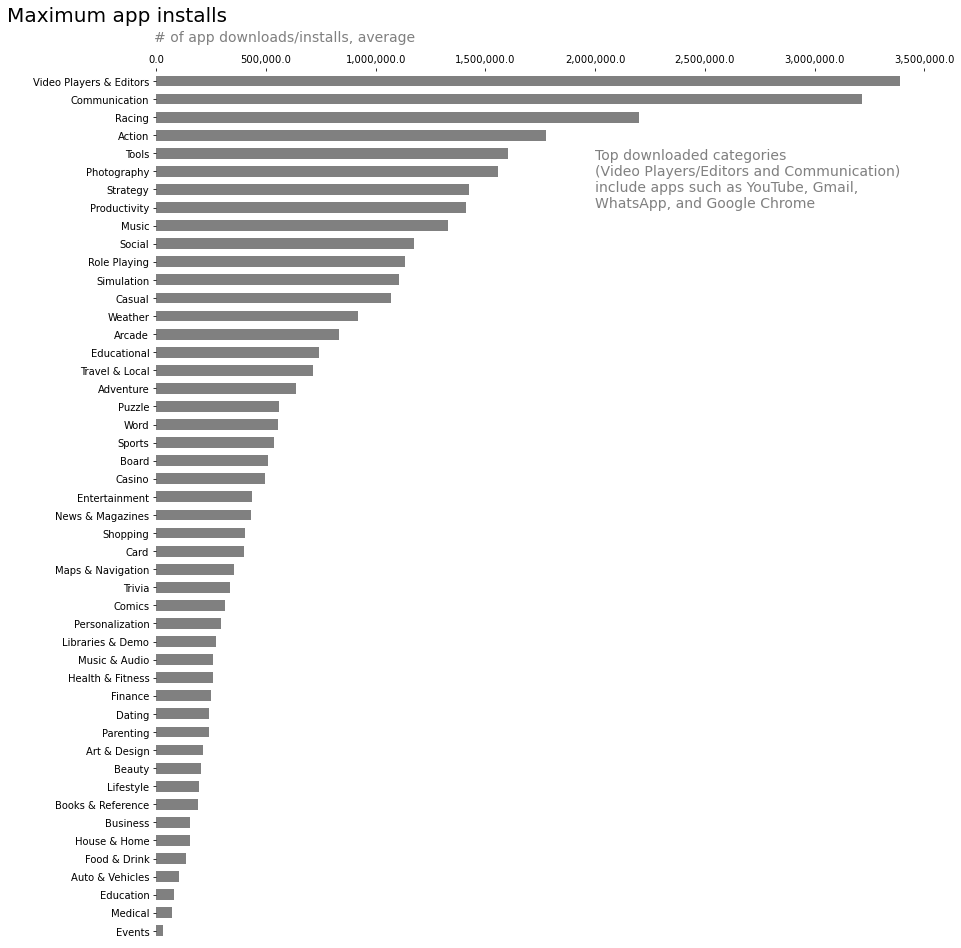

In [31]:
# Group by google categories
categories_grouped = android.groupby("Category")

# Categories with highest minimum installs, average
fig, ax = plt.subplots(figsize = (14, 16))

# Plot results of average downloads for each category
categories_grouped["Maximum Installs"].mean().sort_values(ascending = True).plot.barh(color = "grey", width = 0.6)

# Remove borders
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)

# Remove scientific notation
plt.ticklabel_format(style='plain', axis = "x")

# Title
plt.title("Maximum app installs", size = 20, x = -0.05, y= 1.05)

# Remove y label
plt.ylabel("")

# Set x axis ticks with commas
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

# Set x axis to top
ax.xaxis.tick_top()

# Misc. Text
plt.text(-10000, 49.2, "# of app downloads/installs, average", size = 14, color = "grey")
plt.text(2000000, 40, '''Top downloaded categories 
(Video Players/Editors and Communication) 
include apps such as YouTube, Gmail, 
WhatsApp, and Google Chrome''', size = 14, color = "grey")

plt.show()

### Most downloaded google apps per category

In [32]:
# Group by app name, followed by category
sort_installs = android.groupby(["App Name", "Category"], as_index = False)\
["Maximum Installs"].max().copy() # Get max value for maximum installs, set copy of new dataframe

# Sort new dataframe by the maximum installs column
sort_installs = sort_installs.sort_values(by = "Maximum Installs", ascending = False)

# To retrieve highest downloaded app per category
# Use drop duplicates method on category 
popular_apps = sort_installs.drop_duplicates(subset = "Category", keep = "first") # keep first app (highest downloads)

# Display results
popular_apps

,App Name,Category,Maximum Installs
329925,Google Play services,Tools,12057627016
888315,YouTube,Video Players & Editors,9766230924
329908,Google Maps - Navigate & Explore,Travel & Local,9141671889
329885,Google Chrome: Fast & Secure,Communication,8925640788
329893,Google Drive,Productivity,7028265259
329918,Google Photos,Photography,5754179589
329923,Google Play Games,Entertainment,4605543029
191007,Currents,Social,3929716163
329921,"Google Play Books - Ebooks, Audiobooks, and Co...",Books & Reference,3202676731
329913,Google News - Top world & local news headlines,News & Magazines,2961820154


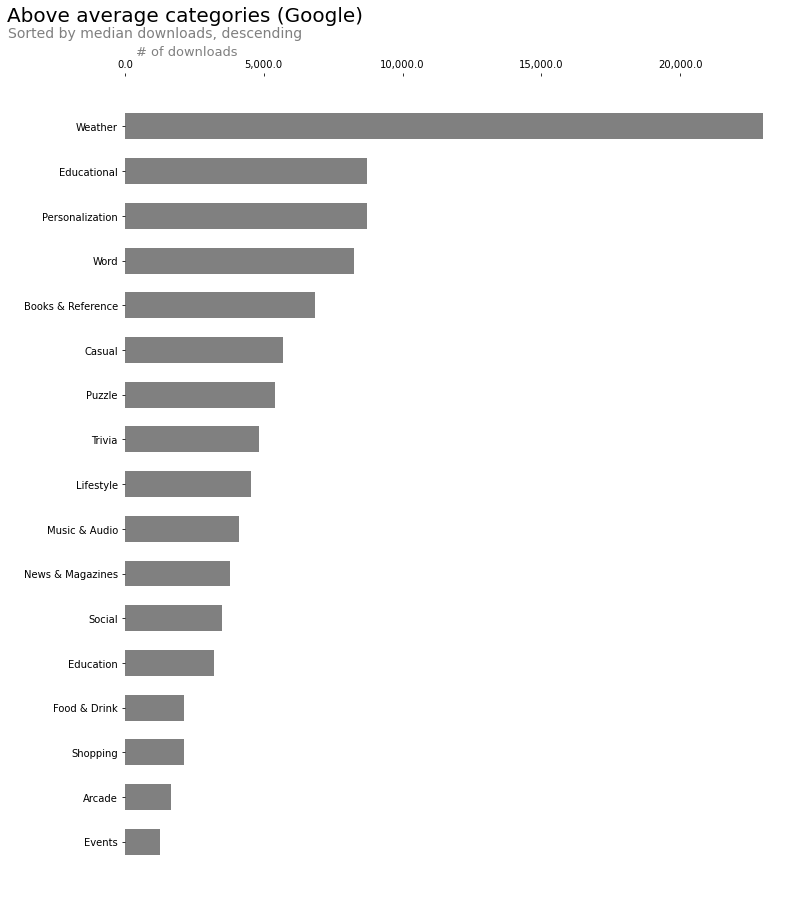

In [33]:
# Above average rated google apps
fig, ax = plt.subplots(figsize=(12, 15))

# Plot results
plt.barh(highest_rated.index, highest_rated["Downloads (Median)"], height = 0.58, color = "grey")

# Title
plt.title("Above average categories (Google)", size = 20, x =0.09, y = 1.06)

# Misc. text
plt.text(-4200,-2.0,"Sorted by median downloads, descending", color = "grey", size = 14)
plt.text(400, -1.6, "# of downloads", color = "grey", size = 13)

# Invert y axis, highest downloaded categories descending order
plt.gca().invert_yaxis()

# Remove borders
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)

# X axis to top
ax.xaxis.tick_top()

# X ticks add comma
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))

### Gaming and Editor's Choice

When we first looked at the content of app categories for both libraries it appeared the apple's library contained far more gaming apps compared to its other categories (education was the second highest at less than 10%). At first it seems like google play has more variety, and more utilitarian app categories. However, google play has divided the gaming categories into multiple different types such as "Puzzle", "Arcade", "Casual", "Simulation", "Action" and so on. Apple merely categories all games into one category: "Games".

The actual difference between both libraries' gaming content is less than 5%. Apple **does** have more game-oriented apps, but it's a small difference.

Generally, there is little difference between the average rating between games and non-games.

Apple's "Games" category average and median rating falls below the average and median of the entire dataset. This category will be excluded for further consideration, thus if we're not developing a game for apple we will not be considering development for the Play store.

Less than 1% of apps are considered *Editor's Choice*. It wouldn't be practical to attempt to gather any further insights from this column. Of editor's choice apps, over half of them are gaming apps. 

In [34]:
# Define function to distinguish non gaming apps from Games genre (apple dataset)
def ios_is_game(row):
    if row != "Games": # if value is not "Games"
        return False 
    else:
        return True

# Apply function to primary genre column
# Creates new column "Game" (boolean datatype) from applied function
ios["Game"] = ios["Primary_Genre"].apply(ios_is_game)

In [35]:
# Frequency of gaming vs. non gaming apps (both datasets)
print("Gaming app frequency (google):")
print(android["Game"].value_counts(normalize = True) * 100)
print("\n")
print("Gaming app frequency (apple):")
print(ios["Game"].value_counts(normalize = True) * 100)

Gaming app frequency (google):
False   81.34
True    18.66
Name: Game, dtype: float64


Gaming app frequency (apple):
False   76.72
True    23.28
Name: Game, dtype: float64


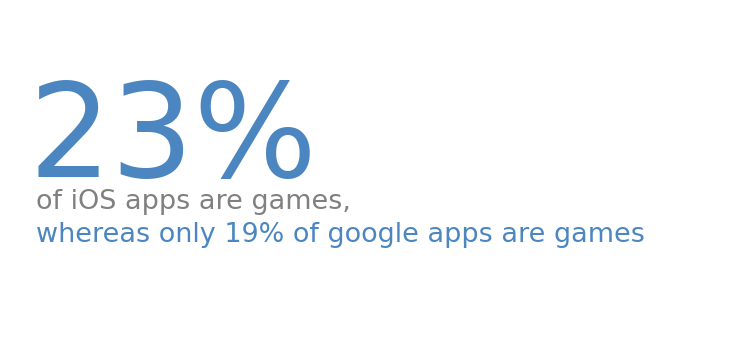

In [36]:
plt.subplots(figsize = (13, 6))
plt.text(0.03,.48,"23%", size = 130, color = "#4B86C1")
plt.text(0.04, 0.38, "of iOS apps are games,", size = 27, color = "grey")
plt.text(0.04, 0.28,"whereas only 19% of google apps are games", size = 27, color = "#4B86C1")
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [37]:
# Gaming vs. non gaming apps average rating (both datasets)
print("Google Ratings:", android.groupby("Game")["Rating"].mean())
print("")
print("Apple Ratings:", ios.groupby("Game")["Average_User_Rating"].mean())

Google Ratings: Game
False   4.15
True    4.13
Name: Rating, dtype: float64

Apple Ratings: Game
False   4.26
True    4.16
Name: Average_User_Rating, dtype: float64


In [38]:
# Frequency of editors choice apps
print("Frequency of Editor's Choice apps (Google only):")
android["Editors Choice"].value_counts(normalize=True) * 100

Frequency of Editor's Choice apps (Google only):


False   99.93
True     0.07
Name: Editors Choice, dtype: float64

In [39]:
# Frequency of editors choice apps that are games
print("Editor's Choice apps that are games (Google only):")
android[android["Editors Choice"] == True]["Game"].value_counts(normalize=True) * 100

Editor's Choice apps that are games (Google only):


True    57.36
False   42.64
Name: Game, dtype: float64

### App filtering 

The following criteria will be used to narrow down the list of app categories to find the top three recommendations.
* A category must have a count of less than 60,000, we can consider anything above that to be a genre that is too saturated
* The number of `Maximum Installs` is greater than or equal to the median number of installs in the dataset
* A rating of at least 4.0

After the filtering process below, we'll see that 28 categories have been removed from the google play dataset. Below, the list of final categories will be used for creating a new dataframe: `android_final`.

The apple iOS dataframe will be filtered down to include only apple categories that have an average rating greater than the average rating of app categories in the `ios` dataset.

In [40]:
# Categories under 60,000 total count
filter = category_pivot_table[(category_pivot_table["Total_Count"] <=60000)\

# Median downloads greater than or equal to the android dataset median 
& (category_pivot_table["Downloads (Median)"] >= android["Maximum Installs"].median())\

# Average rating greater than or equal to 4.0
& (category_pivot_table["Average_Rating"] >= 4)]

print("Removed", android["Category"].nunique() - len(filter.index),"categories from the original dataset")

Removed 28 categories from the original dataset


In [41]:
# All filtered categories to a list
filter.index.to_list()

# All above average rated iOS apps to a list
high_rated_apple = high_rated_apple.index.to_list()

# Google categories that match criteria for potential recommendations
google_list = filter.index.to_list() # Create list from the filtered categories index

# List of categories to remove that are not shared in apple's highest rated categories
# Game apps
to_remove = [
    "Action", 
    "Adventure", 
    "Board", 
    "Card", 
    "Casino", 
    "Casual", 
    "Educational", 
    "Puzzle", 
    "Word",
    "Strategy", 
    "Role Playing", 
    "Racing"
    ] 

# Iterate over google_list to append to new_list
# Empty list to append final items to
new_list_google = []

# All items in google list
for item in google_list:
    if item not in to_remove: # if the item does not belong to the to_remove list
        new_list_google.append(item) # add to the new_list_google, will end up with 5 remaining items

print("Final Google categories:")
print(new_list_google)
print("")
print("Apple top rated categories:")
apple_list = high_rated_apple
print(apple_list)
print("")


Final Google categories:
['Personalization', 'Books & Reference', 'Weather', 'Sports', 'Parenting', 'Finance', 'Art & Design', 'Maps & Navigation']

Apple top rated categories:
['Shopping', 'Developer Tools', 'Food & Drink', 'Graphics & Design', 'Lifestyle', 'Stickers', 'Health & Fitness', 'Social Networking', 'Business', 'Magazines & Newspapers', 'Book', 'Music', 'Medical', 'Sports', 'News', 'Reference']



### Top 3 picks

Since we want to first develop the app for the Google Play store and then implement an iOS version we picked three categories shared between both libraries.

The top three recommendations for the development team to focus on include:
* Personalization (Google) : Graphics & Design (Apple) (phone customization)
* Books & Reference (Google) : Book (Apple) (Dictionaries, religious texts, language translators, etc..)
* Sports : Sports (Sports related apps)

The first metric for consideration is the average rating of the category, followed by the number of downloads. We can consider a category with a high average rating to be generally well-received by the community of app users. Typically, apps within these categories should perform well if the category has a higher average rating. 

A category with a higher number of downloads/installs is a good indication of how frequently a type of app is being used by consumers. Combined with the average rating this should give a clearer idea to the popularity of a particular category.



In [42]:
# Creates new dataframe using the "new_list_google" containing only filtered categories
android_final = android[android["Category"].isin(new_list_google)].copy()

# iOS apps that belong to list of high rated apple apps to new dataframe
ios_final = ios[ios["Primary_Genre"].isin(high_rated_apple)].copy()

In [43]:
# Generate new pivot table, includes only google apps for potential recommendation
# Category as index, count occurences of each category, calculate average rating
# Calculate median number installs (downloads)
pivot_table_android = android_final.pivot_table\
(index = "Category", aggfunc = {"Category" : "count", "Rating" : "mean", "Maximum Installs": "median"})

# Rename columns
pivot_table_android = pivot_table_android.rename\
(columns={"Category":"Total_Count", "Rating":"Average_Rating", "Maximum Installs":"Downloads (Median)"})

# Sort pivot table by average rating descending order
pivot_table_android = pivot_table_android.sort_values(by = "Average_Rating", ascending = False)

# print("The average Google app rating is:", round(android["Rating"].mean(), 2), "out of 5")
pivot_table_android

,Total_Count,Downloads (Median),Average_Rating
Category,,,
Personalization,46477,8719,4.27
Books & Reference,40593,6852,4.27
Weather,4391,22966,4.15
Sports,21900,5696,4.11
Parenting,1466,9756,4.09
Finance,29997,5465,4.08
Art & Design,7032,6936,4.06
Maps & Navigation,10673,5217,4.00


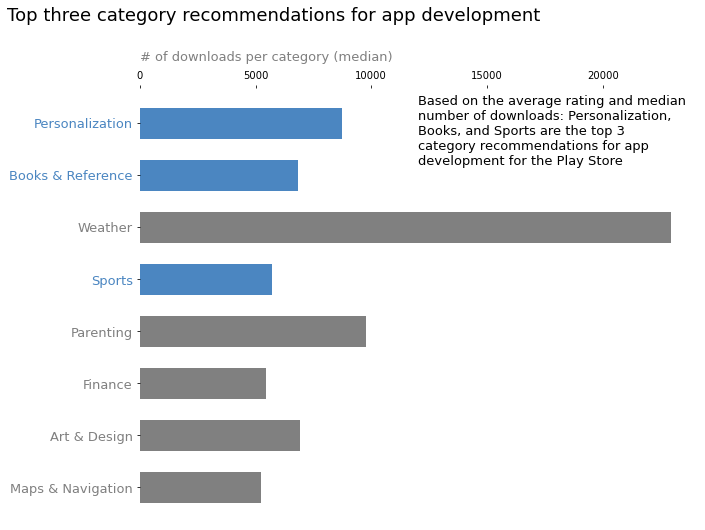

In [44]:
# Top three recommendations
fig, ax = plt.subplots(figsize = (10,8))

# Bar colors
colors = ["#4B86C1","#4B86C1","grey","#4B86C1","grey","grey","grey","grey"]

# Plot results
plt.barh(pivot_table_android.index, pivot_table_android["Downloads (Median)"], color = colors, height = 0.6)

# Invert y axis, highest rated apps on top
plt.gca().invert_yaxis()

# Y ticks
plt.yticks(color = "grey", size = 13)

# Change color of y tick labels
plt.gca().get_yticklabels()[0].set_color("#4B86C1")
plt.gca().get_yticklabels()[1].set_color("#4B86C1")
plt.gca().get_yticklabels()[3].set_color("#4B86C1")

# X axis to top
ax.xaxis.tick_top()

# Title
plt.title("Top three category recommendations for app development", size = 18, x = 0.24, y = 1.14)

# Remove borders
plt.gca().spines[["right","left", "top", "bottom"]].set_visible(False)

# Misc. text
plt.text(0.18, -1.2, "# of downloads per category (median)", size = 13, color = "grey")
plt.text(12000, 0.8,'''Based on the average rating and median 
number of downloads: Personalization,
Books, and Sports are the top 3 
category recommendations for app 
development for the Play Store''', size = 13, color = "black")
#plt.axvline(android["Maximum Installs"].median(), color = "k", alpha = 0.6)
plt.show()

In [45]:
# Creates pivot table from iOS apps for consideration
# Primary Genre as index
# Count all occurences of each category, calculate average user rating
if_pivot = ios_final.pivot_table(index = "Primary_Genre", aggfunc = {"Primary_Genre" : "count", "Average_User_Rating":"mean"})

# Rename columns
if_pivot = if_pivot.rename(columns=({"Primary_Genre": "Total_Count"}))

# Display table
if_pivot

,Average_User_Rating,Total_Count
Primary_Genre,,
Book,4.31,4945
Business,4.34,35493
Developer Tools,4.53,310
Food & Drink,4.48,16879
Graphics & Design,4.45,856
Health & Fitness,4.36,24091
Lifestyle,4.39,32008
Magazines & Newspapers,4.34,439
Medical,4.27,10265


In [46]:
# Creates new dataframe of top three categories
# Shows percentage of apps from category that do support advertisements
ads = pd.DataFrame(
    {
        "Ad_supported_true (percent)": # dataframe column name
        [                # rows: % of apps that do support ads (True)
                         # use value_counts method with normalize true to calcuate percentage
            (android_final[android_final["Category"] == "Personalization"]["Ad Supported"].value_counts(normalize=True) * 100)[1], 
            (android_final[android_final["Category"] == "Books & Reference"]["Ad Supported"].value_counts(normalize=True) * 100)[1],
            (android_final[android_final["Category"] == "Sports"]["Ad Supported"].value_counts(normalize=True) * 100)[1]
            ]
            },
            index = ["Personalization","Books","Sports"]) # indices relate to category names
print("Total percentage of apps that do support in-app advertisements for the top three recommendations:")

# Display dataframe
ads


Total percentage of apps that do support in-app advertisements for the top three recommendations:


,Ad_supported_true (percent)
Personalization,79.87
Books,75.55
Sports,57.53


## Recommendations for Google and Apple

The objective of this project was to identify apps for future development. We quickly realized that manually searching through several million apps would not be a feasible task. Therefore, the best solution for this problem was to analyze the data by category. 

Personalization, Books, or Sports are the top three recommendations for future app development. These are the top-rated categories for each library that have a fair number of downloads. We verified that these categories are not too saturated with current apps. 

* Personalization (Google) : Graphics & Design (Apple) 
    
    The development team could design an app for phone customization that includes unique wallpapers, themes, sounds or other options for customizing a phone/tablet.

* Books & Reference (Google) : Book (Apple) 

    A second option includes books/reference apps. It may be possible to develop an similar to kindle or google play books, or a cliff-notes style app for study/reference, leisure.

* Sports (Google & Apple)

    The third option that the team could consider is an app for tracking or streaming live sports events. This app could show information such as score, player stats, and/or chatrooms with other fans.

Over three quarters of apps in the Personalization and Books categories support in-app advertisements. Only 57% of Sports apps support in-app advertisements, possibly due to other apps requiring a subscription or premium service. Overall, it seems in-app advertisements are normally accepted by users of these app categories.





